In [11]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl (44.5 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\carlosaugustosilva\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
pd.set_option('display.max_columns', None)

In [13]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
column_names_pt_br = [
    'classe',
    'alcool',
    'acido_malico',
    'cinzas',
    'alcalinidade_de_cinzas',
    'magnesio',
    'fenois_totais',
    'flavanoides',
    'fenois_nao_flavanoides',
    'proantocianinas',
    'intensidade_de_cor',
    'matiz',
    'od280_od315_de_vinhos_diluidos',
    'prolina'
]

vinhos = pd.read_csv(url, names=column_names_pt_br, dtype={'classe': object})

vinhos.head()

,classe,alcool,acido_malico,cinzas,alcalinidade_de_cinzas,magnesio,fenois_totais,flavanoides,fenois_nao_flavanoides,proantocianinas,intensidade_de_cor,matiz,od280_od315_de_vinhos_diluidos,prolina
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [14]:
def treinar_knn(random_state, k_values):
    """
    Treina e avalia o KNN para diferentes valores de k e random_state.
    """
    X = vinhos.iloc[:, 1:]
    y = vinhos['classe']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=random_state
    )
    
    resultados = {}
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        resultados[k] = acc
    
    return resultados

In [15]:
k_values = [3, 5]
random_state = 42
resultados_42 = treinar_knn(random_state, k_values)
print(f"Acurácias com random_state = {random_state}:")
for k, acc in resultados_42.items():
    print(f"k = {k}: Accuracy = {acc:.4f}")

Acurácias com random_state = 42:
k = 3: Accuracy = 0.7407
k = 5: Accuracy = 0.7407


In [16]:
random_states = [17, 24]
resultados_totais = {}

for rs in random_states:
    resultados_totais[rs] = treinar_knn(rs, k_values)

for rs, resultados in resultados_totais.items():
    print(f"\nAcurácias com random_state = {rs}:")
    for k, acc in resultados.items():
        print(f"k = {k}: Accuracy = {acc:.4f}")


Acurácias com random_state = 17:
k = 3: Accuracy = 0.6481
k = 5: Accuracy = 0.6667

Acurácias com random_state = 24:
k = 3: Accuracy = 0.7407
k = 5: Accuracy = 0.6667


In [17]:
melhor_config = {"random_state": None, "k": None, "accuracy": 0}

for rs, resultados in resultados_totais.items():
    for k, acc in resultados.items():
        if acc > melhor_config["accuracy"]:
            melhor_config = {"random_state": rs, "k": k, "accuracy": acc}

print("\nMelhor configuração encontrada:")
print(f"Random State: {melhor_config['random_state']}")
print(f"Valor de k: {melhor_config['k']}")
print(f"Accuracy: {melhor_config['accuracy']:.4f}")


Melhor configuração encontrada:
Random State: 24
Valor de k: 3
Accuracy: 0.7407


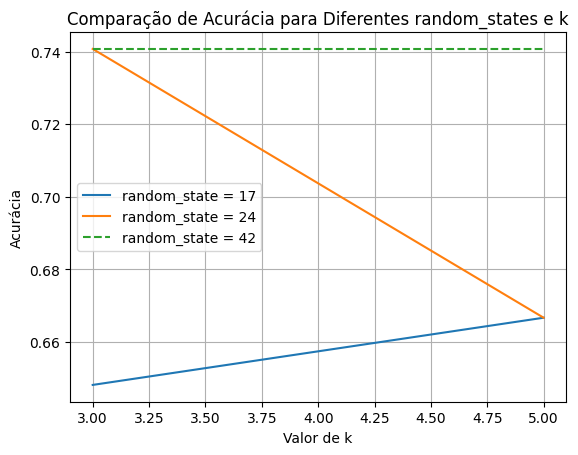

In [18]:


import matplotlib.pyplot as plt
for rs, resultados in resultados_totais.items():
    plt.plot(k_values, list(resultados.values()), label=f"random_state = {rs}")

plt.plot(k_values, list(resultados_42.values()), label="random_state = 42", linestyle="--")
plt.xlabel('Valor de k')
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia para Diferentes random_states e k')
plt.legend()
plt.grid(True)
plt.show()

